In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("DailyDelhiClimateTest.csv")

In [11]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [12]:
df.shape

(114, 5)

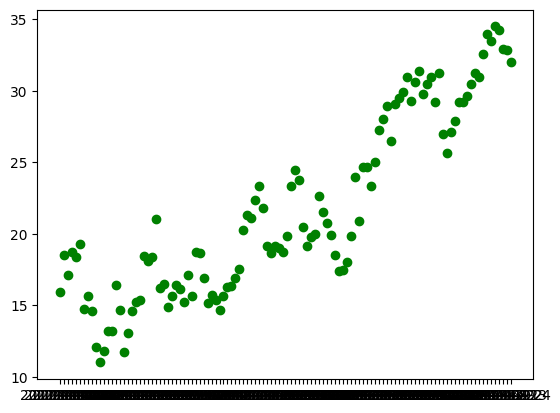

In [13]:
plt.scatter(df["date"], df["meantemp"], label="Daily Temperature Data of Delhi", color="g")
plt.show()

In [15]:
temp = df["meantemp"].ewm(alpha=0.9).mean()
temp

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

In [16]:
df["ewma"] = temp

In [17]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,ewma
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,15.913043
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,18.264822
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,17.225443
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,18.552677
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,18.405266


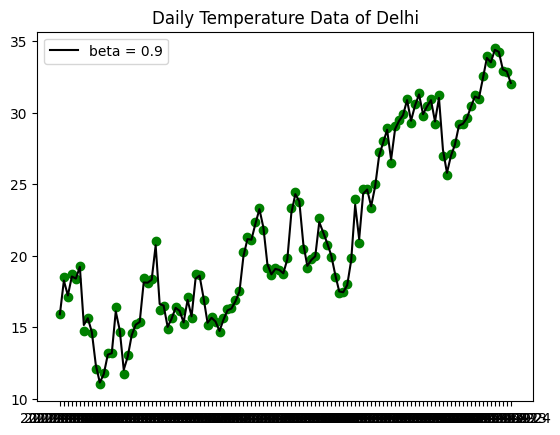

In [22]:
plt.scatter(df["date"], df["meantemp"], color="g")
plt.plot(df["date"], df["ewma"], c="black", label="beta = 0.9")
plt.title("Daily Temperature Data of Delhi")
plt.legend()
plt.show()

In [29]:
beta = [0.1, 0.5, 0.9, 0.98]
temp_df = pd.DataFrame()

for i in beta:
    temp[f"alpha = {i}"] = df["meantemp"].ewm(alpha=i).mean()
    temp = temp[f"alpha = {i}"]
    temp_df[f"alpha = {i}"] = temp
    # temp_df.append(temp)

In [30]:
temp_df

,alpha = 0.1,alpha = 0.5,alpha = 0.9,alpha = 0.98
0,15.913043,15.913043,15.913043,15.913043
1,17.274600,17.637681,18.264822,18.449275
2,17.214272,17.336784,17.225443,17.137864
3,17.646295,18.063833,18.552677,18.668758
4,17.827632,18.231604,18.405266,18.394486
...,...,...,...,...
109,30.640166,33.833047,34.403401,34.480188
110,31.001152,34.041523,34.265340,34.254604
111,31.191039,33.470762,33.036534,32.927092
112,31.359436,33.172881,32.891153,32.876042


In [31]:
temp_df["temp"] = df["meantemp"]

In [32]:
temp_df["date"] = df["date"]

In [33]:
temp_df

,alpha = 0.1,alpha = 0.5,alpha = 0.9,alpha = 0.98,temp,date
0,15.913043,15.913043,15.913043,15.913043,15.913043,2017-01-01
1,17.274600,17.637681,18.264822,18.449275,18.500000,2017-01-02
2,17.214272,17.336784,17.225443,17.137864,17.111111,2017-01-03
3,17.646295,18.063833,18.552677,18.668758,18.700000,2017-01-04
4,17.827632,18.231604,18.405266,18.394486,18.388889,2017-01-05
...,...,...,...,...,...,...
109,30.640166,33.833047,34.403401,34.480188,34.500000,2017-04-20
110,31.001152,34.041523,34.265340,34.254604,34.250000,2017-04-21
111,31.191039,33.470762,33.036534,32.927092,32.900000,2017-04-22
112,31.359436,33.172881,32.891153,32.876042,32.875000,2017-04-23


In [37]:
temp_df.iloc[:,0:4]

,alpha = 0.1,alpha = 0.5,alpha = 0.9,alpha = 0.98
0,15.913043,15.913043,15.913043,15.913043
1,17.274600,17.637681,18.264822,18.449275
2,17.214272,17.336784,17.225443,17.137864
3,17.646295,18.063833,18.552677,18.668758
4,17.827632,18.231604,18.405266,18.394486
...,...,...,...,...
109,30.640166,33.833047,34.403401,34.480188
110,31.001152,34.041523,34.265340,34.254604
111,31.191039,33.470762,33.036534,32.927092
112,31.359436,33.172881,32.891153,32.876042


In [38]:
len(temp_df.iloc[:,0:4].columns)

4

In [51]:
temp_df.columns[2]

'alpha = 0.9'

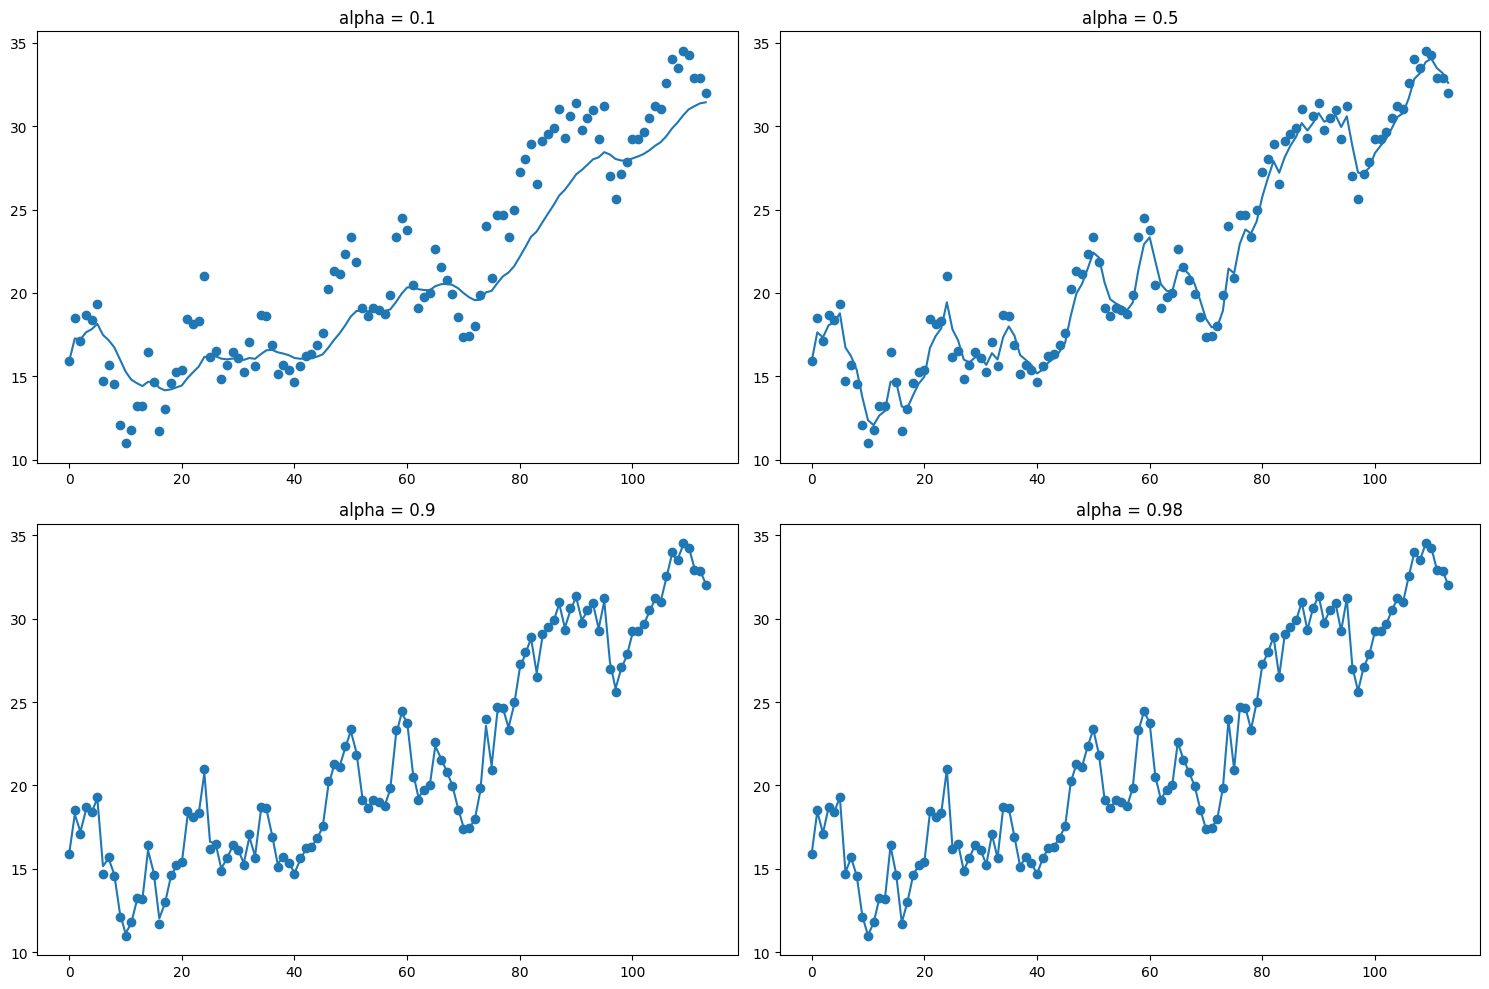

In [56]:
num_cols = len(temp_df.iloc[:,:4].columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten() if num_cols > 1 else [axes]

for col, ax in zip(temp_df.iloc[:,0:4].columns, axes):
    ax.scatter(temp_df.index, temp_df["temp"])
    ax.plot(temp_df.index, temp_df[col])
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

- from above we can conclude that best value for alpha is 0.9